In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [58]:
df = pd.read_csv('insurance.csv')
df.shape

(1338, 7)

In [59]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [61]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [62]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [63]:
fig = px.histogram(df,
                   x='age',
                   nbins=47,
                   marginal='box',
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [64]:
#Distribution of BMI
BMI_fig = px.histogram(df,
                       x='bmi',
                       marginal='box',
                       nbins=39,
                       title='Distribution of BMI')
BMI_fig.update_layout(bargap=0.1)
BMI_fig.show()

In [65]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [66]:
# Distribution of Charges
charges_fig = px.histogram(df,
                           x='charges',
                           marginal='box',
                           color='smoker',
                           color_discrete_sequence=['red','green'],
                           title='Distribution of Charges')
charges_fig.update_layout(bargap=0.1)
charges_fig.show()

In [67]:
# Distribution based on the Sex
sex_fig = px.histogram(df,
                       x='charges',
                       color='sex',
                       marginal='box',
                       title='Distribution based on Sex')
sex_fig.update_layout(bargap=0.1)
sex_fig.show()

In [68]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [69]:
# smoker data visualization based on sex
smoke_fig = px.histogram(df,
                         x='smoker',
                         color='sex',
                         title='Smoker')
smoke_fig.update_layout(bargap=0.1)
smoke_fig.show()

## Visualization between Age and Charges

In [70]:
df
fig = px.scatter(df,
                 x='age',
                 y='charges',
                 color='smoker',
                 title='Relationship between Age and Charges'
                 )
fig.update_traces(marker_size=5)
fig.show()

## Relationship between BMI and Charges

In [71]:
fig = px.scatter(df,
                 x='bmi',
                 y='charges',
                 opacity=0.8,
                 color='smoker')
fig.update_traces(marker_size=5)
fig.show()

In [72]:
px.violin(df, x='children', y='charges')

## Finding Correlation

In [73]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [74]:
df.charges.corr(df.age), df.charges.corr(df.bmi), df.charges.corr(df.children)
# df.charges.corr(df.smoker) will not directly work because smoker column is non-numeric.
# Hence, we need to convert it to numerical form first

(0.2990081933306476, 0.1983409688336288, 0.0679982268479047)

In [75]:
numeric_smoker = (df['smoker']=='yes').astype(int)
df['numeric_smoker'] = numeric_smoker
df.head()

,age,sex,bmi,children,smoker,region,charges,numeric_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [76]:
df.charges.corr(df.numeric_smoker)

0.7872514304984785

In [77]:
df.corr(numeric_only=True)

,age,bmi,children,charges,numeric_smoker
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
numeric_smoker,-0.025019,0.003750,0.007673,0.787251,1.000000


### Correlation is usually visualized through heatmap

Text(0.5, 1.0, 'Correlation Matrix')

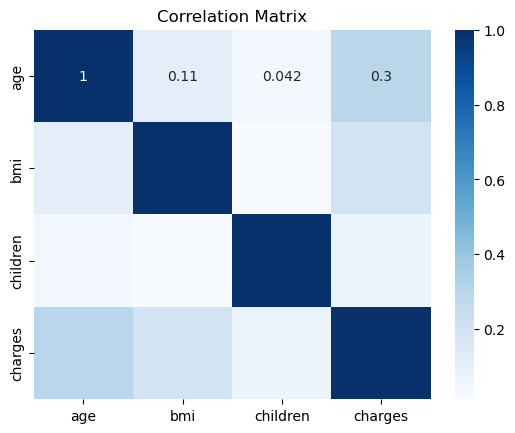

In [78]:
df = df.drop('numeric_smoker',axis=1)
sns.heatmap(df.corr(numeric_only=True), cmap='Blues', annot=True)
plt.title('Correlation Matrix')

## Linear Regression
Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input 
variables (x) and the single output variable (y). More specifically, it assumes that the output
variable (y) can be approximated as a weighted sum of the input variables (x), plus
some noise (error term).
The goal of linear regression is to create a linear equation that best predicts the value of y, based
on the values of x.
The equation takes the form of:
y = β0 + β1x + ε
where β0 is the intercept or constant, β1 is the slope coefficient, x is the input
variable, and ε is the error term.
The coefficients (β0 and β1) are estimated using a method called ordinary least squares (OLS
), which minimizes the sum of the squared errors.
## Simple Linear Regression
Simple linear regression is a type of linear regression where only one independent variable is used to predict the dependent
variable.
## Multiple Linear Regression
Multiple linear regression is a type of linear regression where more than one independent variable is used to predict the
dependent variable.
## Assumptions of Linear Regression
1. **Linearity**: The relationship between the independent and dependent variables should be linear.
2. **Independence**: Each observation should be independent of the others.
3. **Homoscedasticity**: The variance of the residuals should be constant across all levels
of the independent variable.
4. **Normality**: The residuals should be normally distributed.
5. **No or little multicollinearity**: The independent variables should not be highly correlated with
each other.



### y = Wx + b where W: weight, b: bias
Here we will make a linear regression model to find the linear relationship between the charges incurred and the age of the person (although this is a bad comparsion however it still gives us insights on how the premium of a person should be fixed based on their age)

We start with estimating the charges for non-smokers considering their ages

In [88]:
non_smoker_df = df[df['smoker']=='no']
px.scatter(non_smoker_df, x='age', y='charges')

In [97]:
def estimate_charges(age,w,b):
    return w * age + b

# storing all the ages from non_smoker_df into ages
ages = non_smoker_df.age
w = 50
b = 100
predict = estimate_charges(ages,w,b)
predict
# This will give the output of the estimated charges that our model predicts based on certain age

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [96]:
# actual charges
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

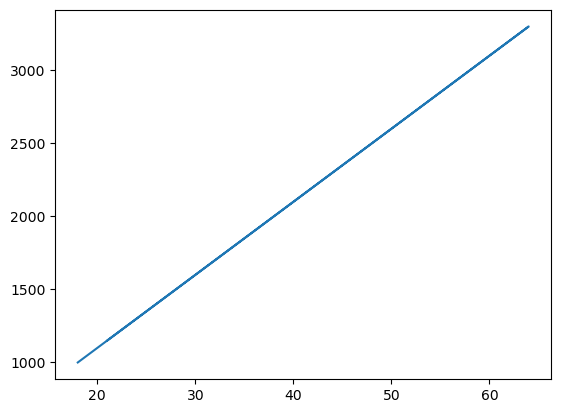

In [107]:
plt.plot(ages, predict)
plt.show()

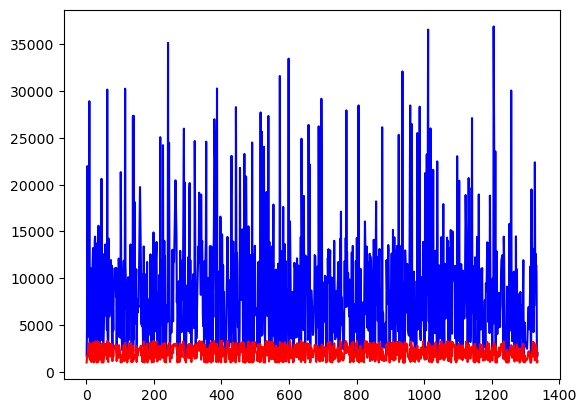

In [106]:
# shows how off our model is from the actual charges
plt.plot(non_smoker_df.charges,'b')
plt.plot(predict,'r')
plt.show()

### Relationship between our model and actual data

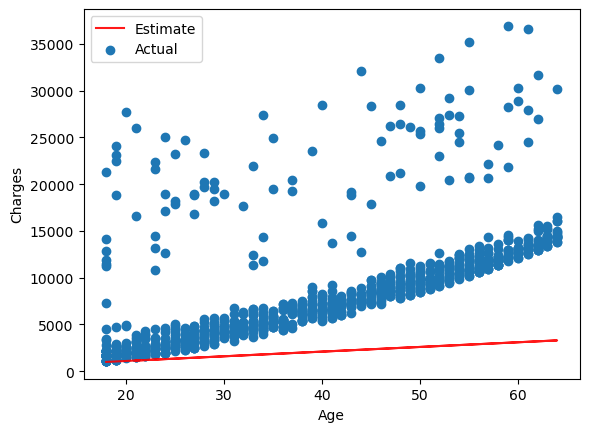

In [111]:
actual_charges = non_smoker_df.charges
plt.plot(ages,predict,'r', alpha=0.9)
plt.scatter(ages, actual_charges)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

We will make a function that will make changes to the slope and bias of the line based on the weights and bias. The bias will increase/decrease the line on y-axis and the weight will change the slope of the line

In [122]:
def plot(w,b):
    charges = estimate_charges(ages,w,b)
    plt.plot(ages,charges,'r',alpha=0.9)
    plt.scatter(ages,actual_charges,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.title('Age vs Charges')
    plt.legend(['Estimate','Actual'])
    plt.show()

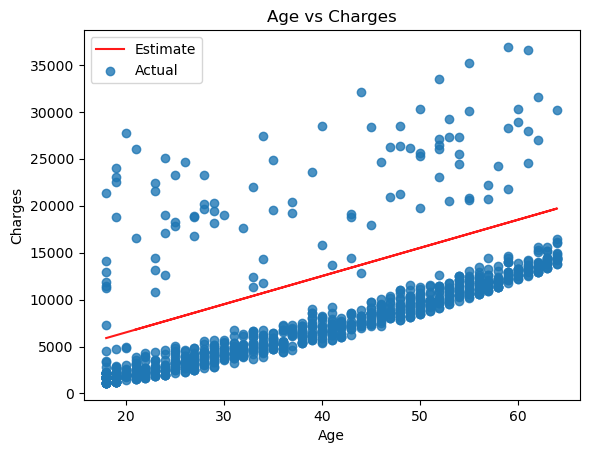

In [123]:
plot(300,500)

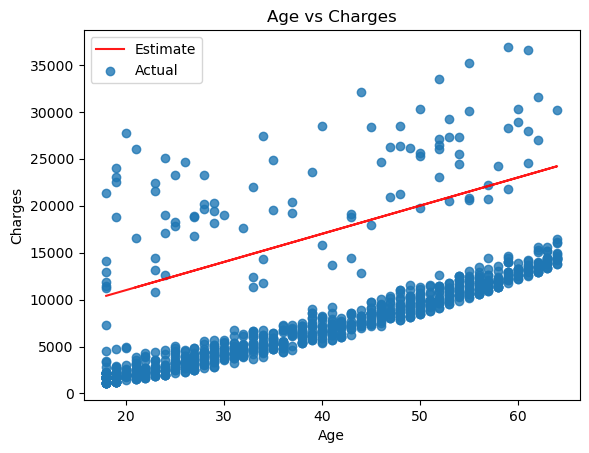

In [126]:
plot(300,5000)

In [1]:
import random
